In [405]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pathlib import Path

pd.set_option("display.max_columns", 500)

np.random.seed(2137) 


In [484]:
#df = pd.read_csv('appartments_train.csv', index_col = 'unit_id')
df = pd.read_csv('appartments_train.csv', index_col = 'unit_id')
df.index.name = None

In [485]:
df.sample(10)

,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,own_type,build_mat,cond_class,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
78a1de0708226437,NaN,48.83,2.0,1.0,3.0,1998.0,7.846,11.0,0.234,0.171,0.623,0.222,0.629,1.739,0.101,12631efb,7ceffe3b,53cced8d,yes,yes,no,no,yes,704287.28,2024-03,693f303c,800711.71,32.67,48.48,62.38,0.999,9.04,105.668549
115a285f1e8bbc20,0d6c4dfc,35.53,2.0,3.0,4.0,1970.0,3.960,8.0,0.294,2.154,0.848,0.286,0.268,0.316,0.255,12631efb,7f8c00f9,53cced8d,no,no,no,no,yes,313238.60,2023-08,8d5a4f0c,258100.50,37.87,26.23,48.00,1.000,3.88,104.927936
a76803b46f21fb29,0d6c4dfc,25.87,2.0,3.0,4.0,1963.0,6.563,23.0,0.267,0.552,0.074,0.329,0.090,1.316,0.061,12631efb,7ceffe3b,NaN,no,yes,no,no,yes,493304.86,2024-04,e0cff11b,409311.56,75.92,17.89,50.33,0.999,12.23,90.167666
6424c0db2a193b6b,0d6c4dfc,58.98,3.0,NaN,3.0,2022.0,4.714,10.0,0.317,2.250,1.087,0.264,0.152,2.146,0.569,12631efb,7ceffe3b,NaN,no,yes,yes,no,no,1991412.59,2023-10,693f303c,2008616.80,1.00,3.01,38.72,1.000,23.90,94.343251
390664e65d2bd159,0c238f18,51.72,2.0,3.0,3.0,NaN,0.593,121.0,0.016,0.108,0.258,0.100,0.026,0.111,0.023,12631efb,7ceffe3b,NaN,no,no,no,no,no,583340.31,2023-08,0ab06839,497593.97,NaN,92.23,35.79,1.000,9.70,104.708779
467a68c5b1e2a638,0c238f18,44.99,2.0,3.0,6.0,1961.0,1.315,81.0,0.133,0.535,0.173,0.425,0.015,0.305,0.452,12631efb,7ceffe3b,a2881958,no,no,yes,no,no,696695.01,2023-11,693f303c,760572.57,78.62,54.11,69.87,1.000,6.46,95.629116
223961fb32c9f378,2a6d5c01,55.91,3.0,5.0,6.0,2023.0,0.251,98.0,0.495,0.728,0.312,0.265,0.040,0.946,0.249,12631efb,7ceffe3b,NaN,no,no,yes,no,no,1372652.41,2024-06,e0cff11b,1552494.92,1.30,53.47,69.91,1.000,7.97,107.830152
d405785608a95062,0d6c4dfc,75.11,4.0,3.0,3.0,2011.0,16.980,2.0,0.758,NaN,0.720,0.273,0.364,NaN,0.686,12631efb,7ceffe3b,a2881958,no,yes,no,yes,no,520878.21,2023-08,693f303c,522689.71,8.24,94.83,64.45,0.998,24.96,105.255044
531952a298de2f42,0d6c4dfc,35.35,1.0,NaN,3.0,1965.0,1.664,9.0,0.278,0.783,0.223,0.778,0.468,1.633,0.381,12631efb,NaN,NaN,no,no,no,no,yes,373127.46,2024-01,e0cff11b,381721.48,81.90,2.16,55.92,1.000,6.67,92.882208
cd4b403eca3297f4,2a6d5c01,77.95,4.0,10.0,12.0,2020.0,4.882,17.0,0.355,0.112,0.135,0.322,0.266,2.365,0.062,12631efb,7ceffe3b,NaN,no,no,yes,no,no,1689740.47,2023-12,693f303c,1812499.92,2.06,20.78,44.19,1.000,14.79,93.899531


In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156454 entries, a3a463617a5c0439 to 53618f0f04ae1dbd
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   obj_type                    122634 non-null  object 
 1   dim_m2                      156454 non-null  float64
 2   n_rooms                     156454 non-null  float64
 3   floor_no                    128756 non-null  float64
 4   floor_max                   154533 non-null  float64
 5   year_built                  130741 non-null  float64
 6   dist_centre                 156454 non-null  float64
 7   n_poi                       156454 non-null  float64
 8   dist_sch                    156324 non-null  float64
 9   dist_clinic                 155883 non-null  float64
 10  dist_post                   156266 non-null  float64
 11  dist_kind                   156291 non-null  float64
 12  dist_rest                   156063 non-null  float64

In [487]:
missing_percent = (df.isna().sum() / len(df) * 100).round(2)
print(missing_percent)

obj_type                      21.62
dim_m2                         0.00
n_rooms                        0.00
floor_no                      17.70
floor_max                      1.23
year_built                    16.43
dist_centre                    0.00
n_poi                          0.00
dist_sch                       0.08
dist_clinic                    0.36
dist_post                      0.12
dist_kind                      0.10
dist_rest                      0.25
dist_uni                       2.76
dist_pharma                    0.14
own_type                       0.00
build_mat                     39.63
cond_class                    74.82
has_park                       0.00
has_balcony                    0.00
has_lift                       4.94
has_sec                        0.00
has_store                      0.00
price_z                        0.00
src_month                      0.00
loc_code                       0.00
market_volatility              0.00
infrastructure_quality      

variable "cond_class" has over 70% of NAs - I will delete it. When it comes to others, I'll manage it other ways :p
same for "build_mat" - nearly 40% miss and its anonymized - no point in keeping

what's more, "green_space_ratio" is almost constant variable. It doesnt give new information. Will drop it also

In [488]:
df = df.drop(columns=['cond_class', 'build_mat', 'green_space_ratio'])

Dealing with NAs

In [489]:
# setting "obj_type" to 'other" if its missing
df['obj_type'] = df['obj_type'].fillna('other')

# using median value (4) for max floor if its missing
df['floor_max'] = df['floor_max'].fillna(4)

# if there is no floor, choose mid of the building
df['floor_no'] = df['floor_no'].fillna(df['floor_max']/2)

# when it comes to year I'll choose mid value between mean and median - 1990
df['year_built'] = df['year_built'].fillna(1990)

# for all distances I'll use the average of mean and median
dist_columns = ['dist_centre', 'dist_sch','dist_clinic','dist_post', 'dist_kind',
                'dist_rest', 'dist_uni', 'dist_pharma']

for col in dist_columns:
    avg_mean_median = (df[col].mean() + df[col].median()) / 2
    df[col] = df[col].fillna(avg_mean_median)

# managing all "has.." variables. If null happens - we will code it as "no". Then change into boolean
has_columns = ['has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store']

for col in has_columns:
    df[col] = df[col].fillna('no')
    df[col] = df[col].map({'no':0, 'yes':1})


# dealing with other measures. If NA happen, I will use average of mean and median (to mitigate outliers). 

other_measures = ['market_volatility', 'infrastructure_quality', 'neighborhood_crime_rate', 'popularity_index',
                'estimated_maintenance_cost', 'global_economic_index']

for col in other_measures:
    avg_mean_median = (df[col].mean() + df[col].median()) / 2
    df[col] = df[col].fillna(avg_mean_median)


In [490]:
df['src_month'] = pd.to_datetime(df['src_month'], format='%Y-%m')
df['src_year'] = df['src_month'].dt.year
df['src_month'] = df['src_month'].dt.month


In [491]:
print(df.describe())

              dim_m2        n_rooms       floor_no      floor_max  \
count  156454.000000  156454.000000  156454.000000  156454.000000   
mean       58.702447       2.678634       3.112103       5.296739   
std        23.278725       0.916015       2.396628       3.294439   
min        18.780000       1.000000       0.500000       1.000000   
25%        42.240000       2.000000       1.500000       3.000000   
50%        54.240000       3.000000       2.000000       4.000000   
75%        69.820000       3.000000       4.000000       6.000000   
max       187.310000       6.000000      29.000000      29.000000   

          year_built    dist_centre          n_poi       dist_sch  \
count  156454.000000  156454.000000  156454.000000  156454.000000   
mean     1986.666196       4.357027      20.611509       0.413250   
std        30.926609       2.900580      24.212745       0.469189   
min      1850.000000       0.008000       0.000000       0.002000   
25%      1970.000000       2.0000

In [492]:
missing_percent = (df.isna().sum() / len(df) * 100).round(2)
print(missing_percent)

obj_type                      0.0
dim_m2                        0.0
n_rooms                       0.0
floor_no                      0.0
floor_max                     0.0
year_built                    0.0
dist_centre                   0.0
n_poi                         0.0
dist_sch                      0.0
dist_clinic                   0.0
dist_post                     0.0
dist_kind                     0.0
dist_rest                     0.0
dist_uni                      0.0
dist_pharma                   0.0
own_type                      0.0
has_park                      0.0
has_balcony                   0.0
has_lift                      0.0
has_sec                       0.0
has_store                     0.0
price_z                       0.0
src_month                     0.0
loc_code                      0.0
market_volatility             0.0
infrastructure_quality        0.0
neighborhood_crime_rate       0.0
popularity_index              0.0
estimated_maintenance_cost    0.0
global_economi

In [493]:
df.info()
df.to_csv('appartments_train_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 156454 entries, a3a463617a5c0439 to 53618f0f04ae1dbd
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   obj_type                    156454 non-null  object 
 1   dim_m2                      156454 non-null  float64
 2   n_rooms                     156454 non-null  float64
 3   floor_no                    156454 non-null  float64
 4   floor_max                   156454 non-null  float64
 5   year_built                  156454 non-null  float64
 6   dist_centre                 156454 non-null  float64
 7   n_poi                       156454 non-null  float64
 8   dist_sch                    156454 non-null  float64
 9   dist_clinic                 156454 non-null  float64
 10  dist_post                   156454 non-null  float64
 11  dist_kind                   156454 non-null  float64
 12  dist_rest                   156454 non-null  float64

everything looks perfectly fine, lets create some features!

In [494]:
# checking if apartment is on the last floor
df['last_floor'] = np.where(df['floor_no'] == df['floor_max'], 1, 0)

In [ ]:
corr_columns = df.drop(columns = ['obj_type','loc_code', 'own_type'])

plt.figure(figsize=(24, 16))
sns.heatmap(corr_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

I notice that some variables are highly and weakly correlated. I won't delete them - in next steps I will apply regularisations (f.e. Lasso) which will cover that problem

In [496]:
df.head()

,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,own_type,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,estimated_maintenance_cost,global_economic_index,src_year,last_floor
a3a463617a5c0439,0d6c4dfc,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,0.878,0.438,0.134,0.539,2.243,0.168,12631efb,1,1,1,0,1,519626.21,9,693f303c,501710.76,14.02,95.39,44.51,13.99,100.291946,2023,0
23a92531fcb238b4,0c238f18,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,0.979,0.062,0.248,0.151,2.004,0.160,12631efb,1,1,0,0,0,162959.26,4,8d5a4f0c,147763.87,110.55,46.17,56.25,7.59,91.315644,2024,0
d158671401f9fc34,0d6c4dfc,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,1.242,0.563,0.266,0.433,2.067,0.575,12631efb,0,1,0,0,1,1167571.51,10,693f303c,1042847.59,31.15,18.94,50.36,21.14,93.681619,2023,0
280aced4655b7a96,2a6d5c01,53.68,2.0,2.0,4.0,2018.0,10.589,30.0,0.729,1.911,0.045,0.187,0.240,2.648,0.147,12631efb,1,0,1,0,0,907071.16,1,693f303c,728839.39,7.52,11.84,46.69,7.91,94.192062,2024,0
2315fa621e746fe4,2a6d5c01,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,1.974,1.390,0.502,0.088,1.043,0.031,12631efb,1,1,1,0,0,1080383.19,11,693f303c,1263171.15,11.20,89.64,45.60,8.63,96.166051,2023,0


### Target variable analysis

In [497]:
df.price_z.mean().round(2)

np.float64(784808.03)

In [498]:
df.price_z.median().round(2)

np.float64(690193.49)

In [499]:
df.price_z.mode()

0       182883.11
1       248780.89
2       284816.47
3       284993.36
4       291182.62
          ...    
118     969280.24
119     975660.06
120    1053076.56
121    1063487.70
122    1242076.99
Name: price_z, Length: 123, dtype: float64

In [500]:
[{i: round(df.price_z.quantile(i), 2)} for i in np.arange(0, 1.1, 0.1)]

[{np.float64(0.0): np.float64(119636.88)},
 {np.float64(0.1): np.float64(360659.34)},
 {np.float64(0.2): np.float64(459832.56)},
 {np.float64(0.30000000000000004): np.float64(541159.67)},
 {np.float64(0.4): np.float64(615223.11)},
 {np.float64(0.5): np.float64(690193.49)},
 {np.float64(0.6000000000000001): np.float64(772831.9)},
 {np.float64(0.7000000000000001): np.float64(877841.59)},
 {np.float64(0.8): np.float64(1028955.61)},
 {np.float64(0.9): np.float64(1314827.98)},
 {np.float64(1.0): np.float64(3921744.77)}]

In [501]:
df.price_z.var().round(2)

np.float64(185042317115.56)

In [502]:
df.price_z.std().round(2)

np.float64(430165.45)

In [503]:
df.price_z.mean().round(2)

np.float64(784808.03)

In [504]:
df.price_z.skew().round(2)

np.float64(1.84)

In [505]:
df.price_z.kurtosis().round(2)

np.float64(5.2)

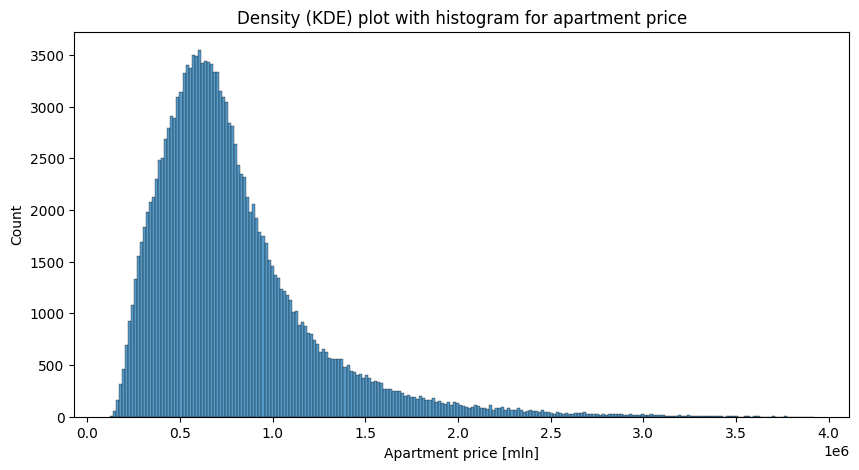

In [506]:
plt.figure(figsize=(10, 5))
sns.histplot(df.price_z).set(title="Density (KDE) plot with histogram for apartment price")
plt.xlabel('Apartment price [mln]')
plt.show()

From statistics and chart I notice, that apartment price distribution is really skewed. I'll try to log it

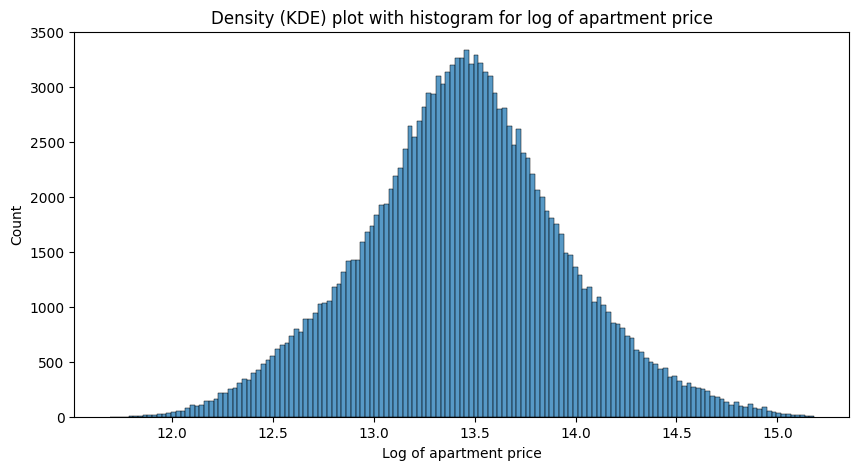

In [507]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log(df.price_z)).set(title="Density (KDE) plot with histogram for log of apartment price")
plt.xlabel('Log of apartment price')
plt.show()

Much better! gonna make new variable - log of price

In [508]:
df['log_price'] = np.log(df['price_z'])

df.log_price.mean().round(2)

np.float64(13.45)

In [509]:
df.log_price.median().round(2)

np.float64(13.44)

In [510]:
df.log_price.std().round(2)

np.float64(0.5)

In [511]:
df.log_price.skew().round(2)

np.float64(0.06)

In [512]:
df.log_price.kurtosis().round(2)

np.float64(0.12)

C:\Users\wojci\AppData\Local\Temp\ipykernel_9100\3105219057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


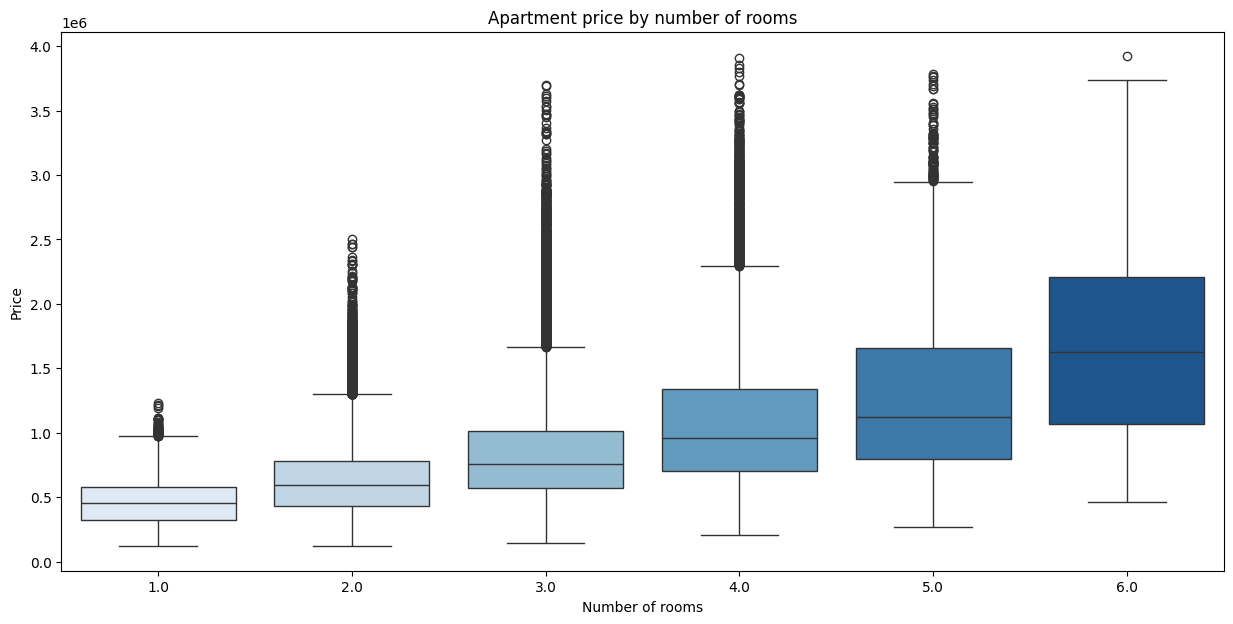

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.boxplot(
    x=df.n_rooms, 
    y=df.price_z, 
    palette="Blues"  # You can try other palettes like "husl", "Paired", or define your own
).set(title="Apartment price by number of rooms")

plt.xlabel("Number of rooms")
plt.ylabel("Price")
plt.show()

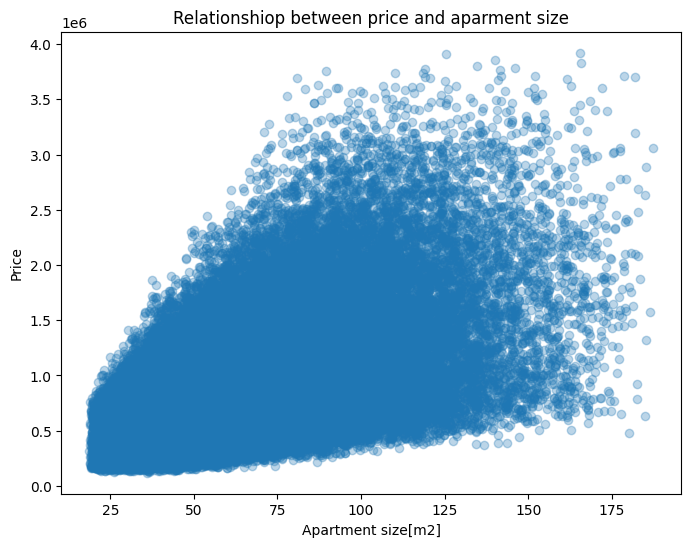

In [514]:

plt.figure(figsize=(8, 6))
plt.scatter(df['dim_m2'], df['price_z'], alpha=0.3)
plt.xlabel('Apartment size[m2]')
plt.ylabel('Price')
plt.title('Relationshiop between price and aparment size')
plt.show()


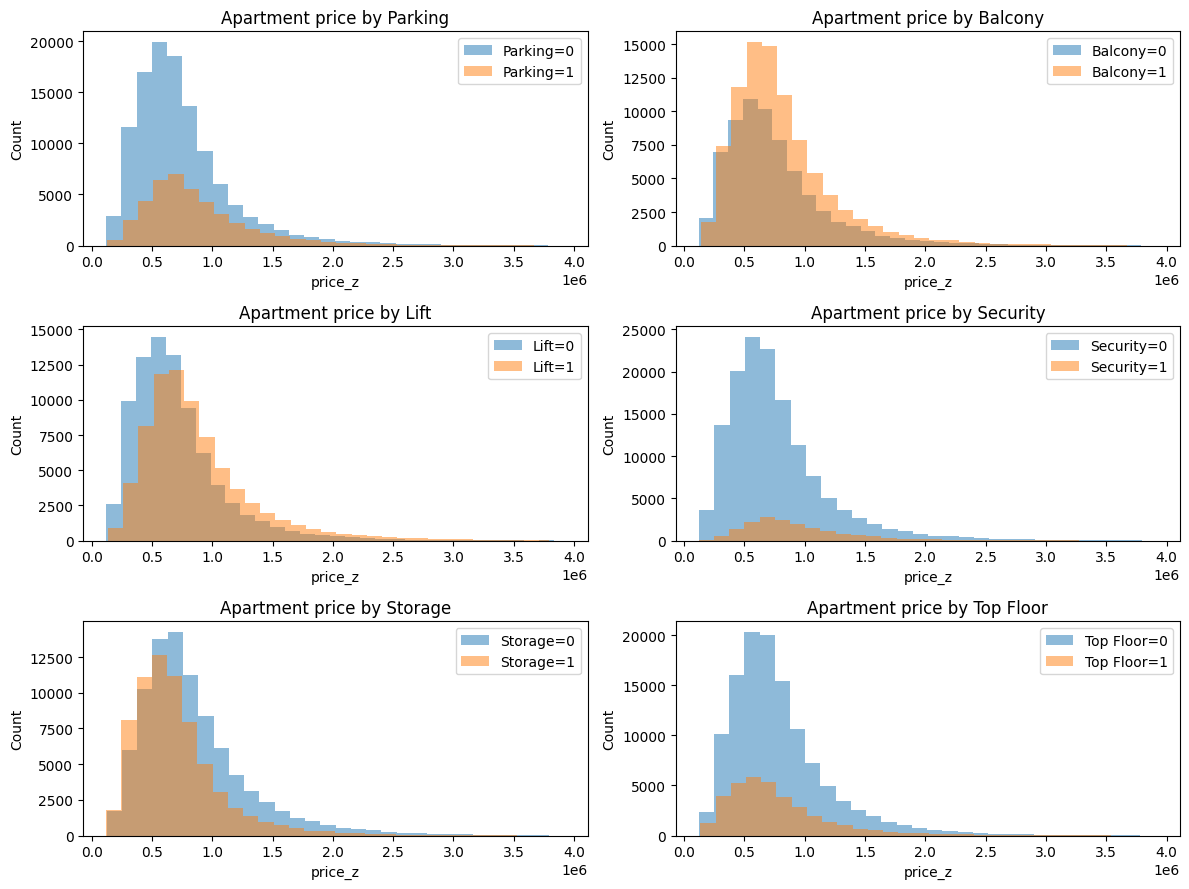

In [515]:
bin_columns = ['has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store', 'last_floor']

pretty_names = {
    'has_park': 'Parking',
    'has_balcony': 'Balcony',
    'has_lift': 'Lift',
    'has_sec': 'Security',
    'has_store': 'Storage',
    'last_floor': 'Top Floor'
}

n_cols = 2
n_rows = (len(bin_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for idx, col in enumerate(bin_columns):
    ax = axes.flatten()[idx]
    df[df[col] == 0]['price_z'].plot.hist(
        bins=30, alpha=0.5, ax=ax, label=f'{pretty_names[col]}=0'
    )
    df[df[col] == 1]['price_z'].plot.hist(
        bins=30, alpha=0.5, ax=ax, label=f'{pretty_names[col]}=1'
    )
    ax.set_title(f"Apartment price by {pretty_names[col]}")
    ax.set_xlabel('price_z')
    ax.set_ylabel('Count')
    ax.legend()

# Hide unused axes if number of plots is odd
for i in range(len(bin_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


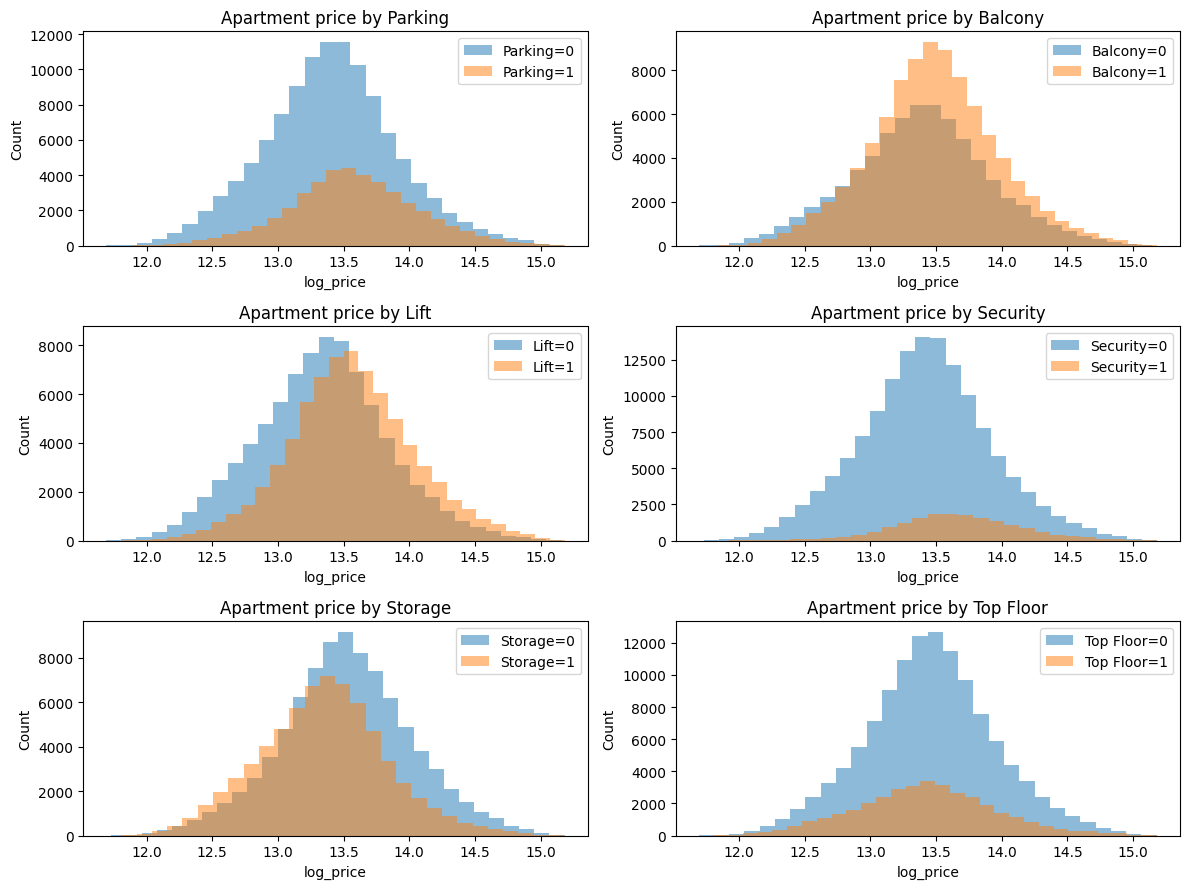

In [516]:
bin_columns = ['has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store', 'last_floor']

pretty_names = {
    'has_park': 'Parking',
    'has_balcony': 'Balcony',
    'has_lift': 'Lift',
    'has_sec': 'Security',
    'has_store': 'Storage',
    'last_floor': 'Top Floor'
}

n_cols = 2
n_rows = (len(bin_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for idx, col in enumerate(bin_columns):
    ax = axes.flatten()[idx]
    df[df[col] == 0]['log_price'].plot.hist(
        bins=30, alpha=0.5, ax=ax, label=f'{pretty_names[col]}=0'
    )
    df[df[col] == 1]['log_price'].plot.hist(
        bins=30, alpha=0.5, ax=ax, label=f'{pretty_names[col]}=1'
    )
    ax.set_title(f"Apartment price by {pretty_names[col]}")
    ax.set_xlabel('log_price')
    ax.set_ylabel('Count')
    ax.legend()

# Hide unused axes if number of plots is odd
for i in range(len(bin_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


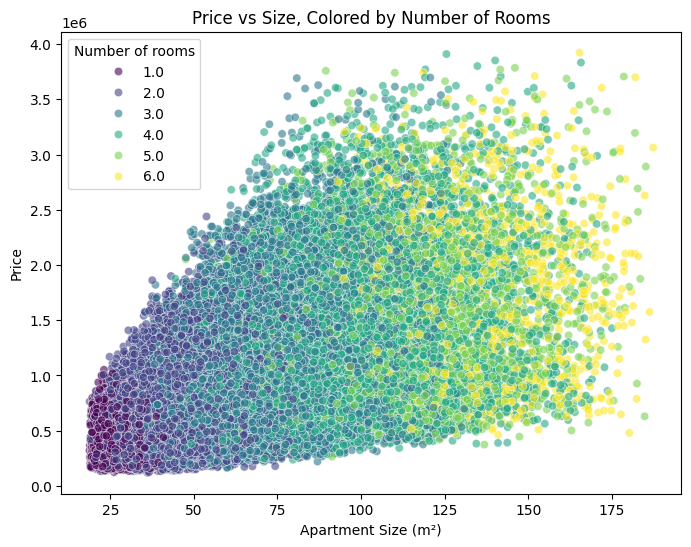

In [517]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='dim_m2', y='price_z', hue='n_rooms', palette='viridis', alpha=0.6)
plt.xlabel('Apartment Size (m²)')
plt.ylabel('Price')
plt.title('Price vs Size, Colored by Number of Rooms')
plt.legend(title='Number of rooms')
plt.show()


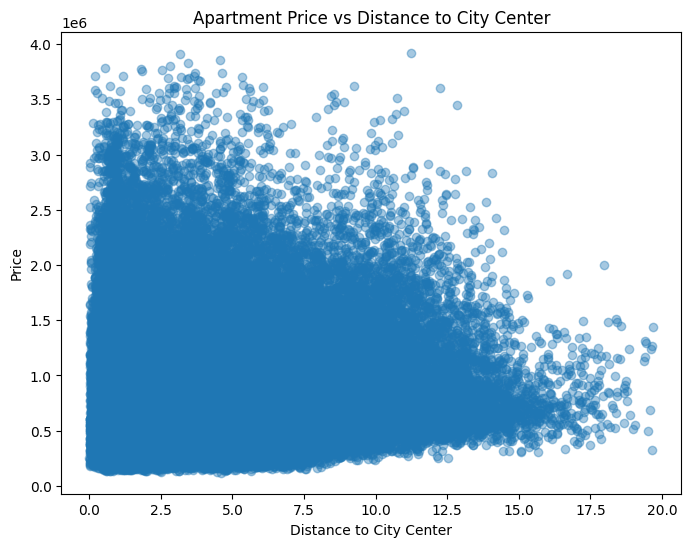

In [518]:

plt.figure(figsize=(8, 6))
plt.scatter(df['dist_centre'], df['price_z'], alpha=0.4)
plt.xlabel('Distance to City Center')
plt.ylabel('Price')
plt.title('Apartment Price vs Distance to City Center')
plt.show()


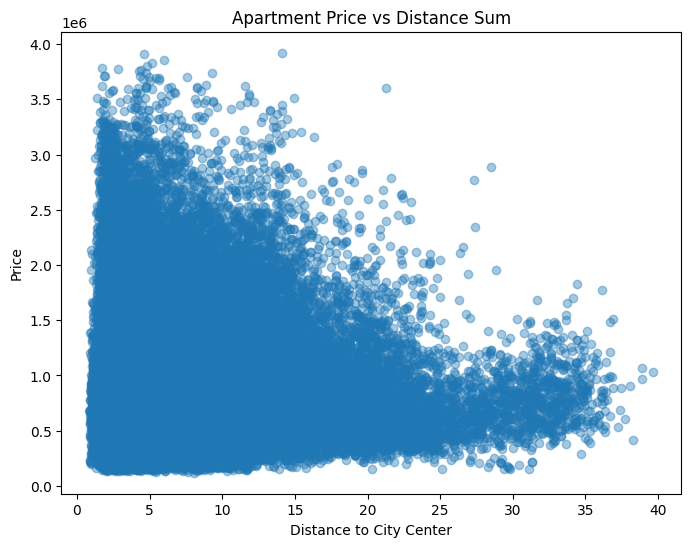

In [519]:
plt.figure(figsize=(8, 6))
plt.scatter(df['dist_centre']+df['dist_clinic']+df['dist_sch']+df['dist_post']+df['dist_pharma']+df['dist_kind']+df['dist_rest'], df['price_z'], alpha=0.4)
plt.xlabel('Distance to City Center')
plt.ylabel('Price')
plt.title('Apartment Price vs Distance Sum')
plt.show()

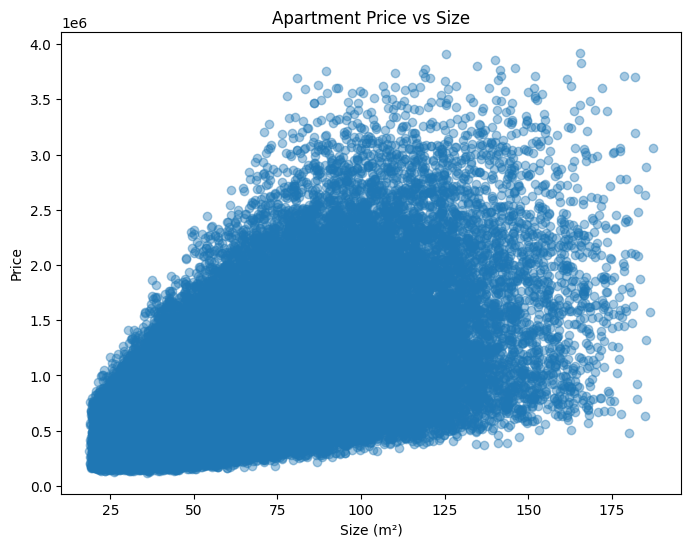

In [520]:
plt.figure(figsize=(8, 6))
plt.scatter(df['dim_m2'], df['price_z'], alpha=0.4)
plt.xlabel('Size (m²)')
plt.ylabel('Price')
plt.title('Apartment Price vs Size')
plt.show()

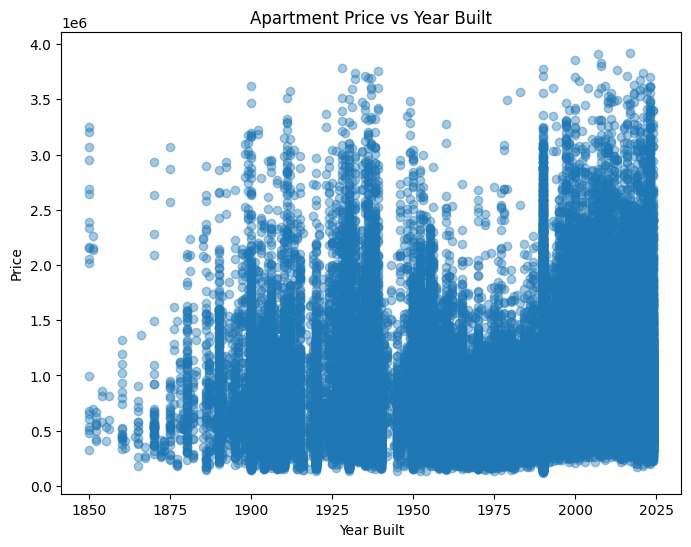

In [521]:
plt.figure(figsize=(8, 6))
plt.scatter(df['year_built'], df['price_z'], alpha=0.4)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Apartment Price vs Year Built')
plt.show()

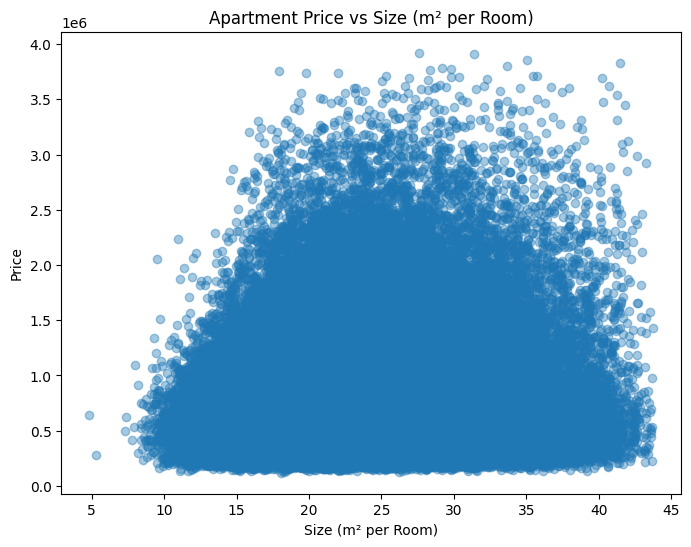

In [522]:
plt.figure(figsize=(8, 6))
plt.scatter(df['dim_m2']/df['n_rooms'], df['price_z'], alpha=0.4)
plt.xlabel('Size (m² per Room)')
plt.ylabel('Price')
plt.title('Apartment Price vs Size (m² per Room)')
plt.show()
df['room_size'] = df['dim_m2'] / df['n_rooms']

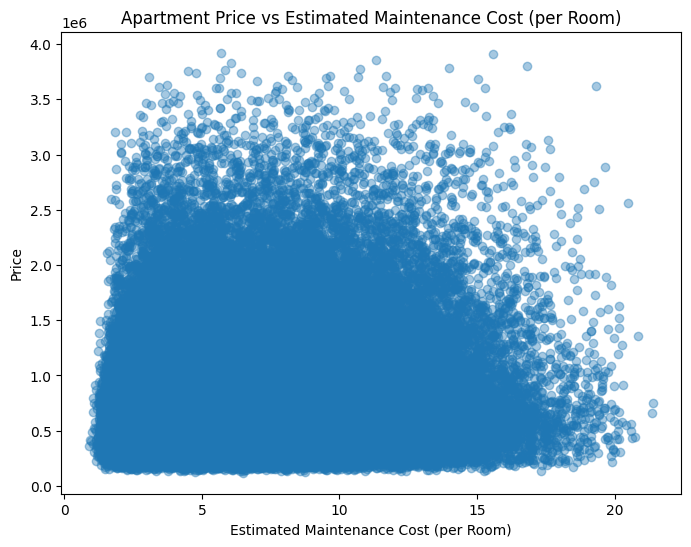

In [523]:
plt.figure(figsize=(8, 6))
plt.scatter(df['estimated_maintenance_cost']/df['n_rooms'], df['price_z'], alpha=0.4)
plt.xlabel('Estimated Maintenance Cost (per Room)')
plt.ylabel('Price')
plt.title('Apartment Price vs Estimated Maintenance Cost (per Room)')
plt.show()
df['cost_per_room'] = df['estimated_maintenance_cost']/df['n_rooms']

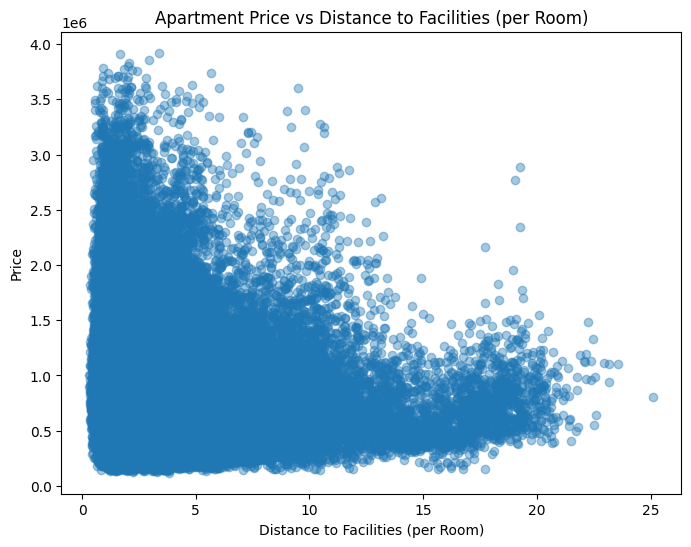

In [524]:
plt.figure(figsize=(8, 6))
plt.scatter(df['dist_clinic'] + df['dist_rest'] + df['dist_kind'] + df['dist_uni'] + df['dist_pharma'], df['price_z'], alpha=0.4)
plt.xlabel('Distance to Facilities (per Room)')
plt.ylabel('Price')
plt.title('Apartment Price vs Distance to Facilities (per Room)')
plt.show()
df['dist_facil'] = df['dist_clinic'] + df['dist_rest'] + df['dist_kind'] + df['dist_uni'] + df['dist_pharma']

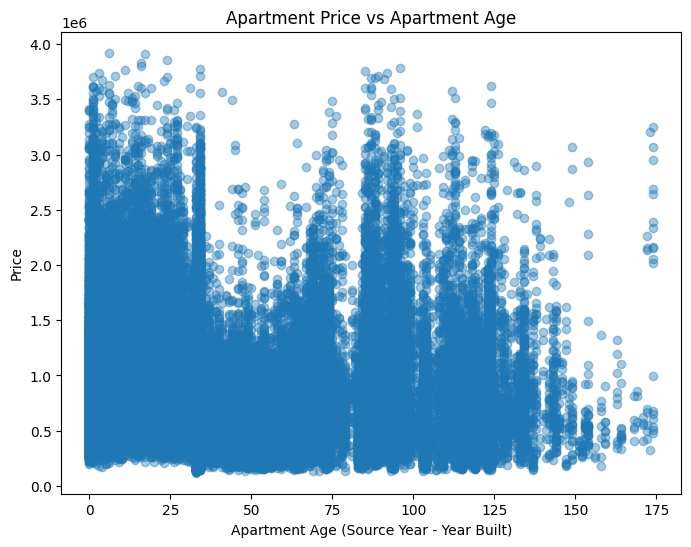

In [545]:
plt.figure(figsize=(8, 6))
plt.scatter(df['src_year'] - df['year_built'], df['price_z'], alpha=0.4)
plt.xlabel('Apartment Age (Source Year - Year Built)')
plt.ylabel('Price')
plt.title('Apartment Price vs Apartment Age')
plt.show()
df['apart_age'] = df['src_year'] - df['year_built']

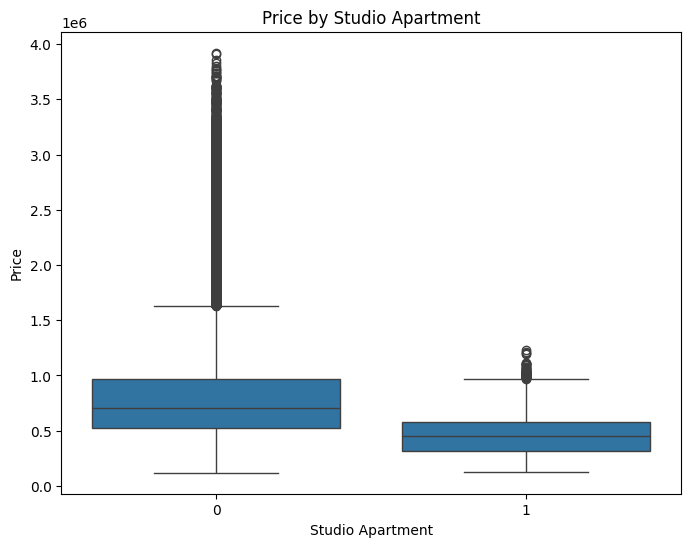

In [575]:
#Check correlation for flats on ground floor
df['is_studio'] = np.where((df['n_rooms'] == 1), 1, 0)
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_studio', y='price_z', data=df)
plt.xlabel('Studio Apartment')
plt.ylabel('Price')
plt.title('Price by Studio Apartment')
plt.show()

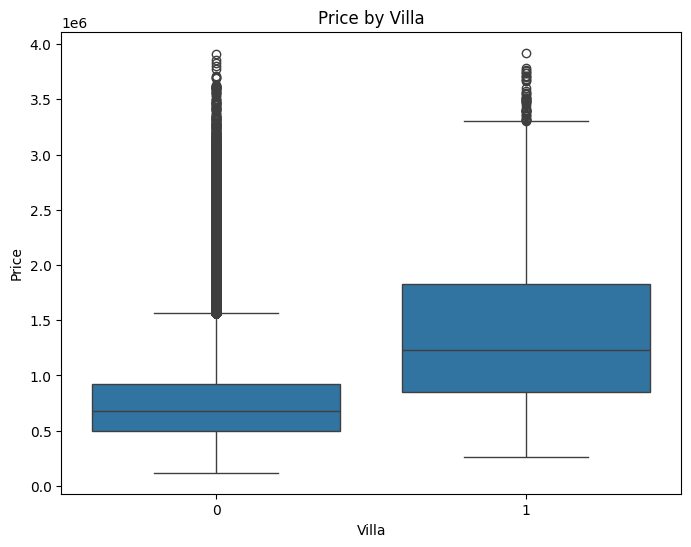

In [639]:
#Check correlation for flats on ground floor
df['is_villa'] = np.where((df['n_rooms'] >= 5), 1, 0)
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_villa', y='price_z', data=df)
plt.xlabel('Villa')
plt.ylabel('Price')
plt.title('Price by Villa')
plt.show()

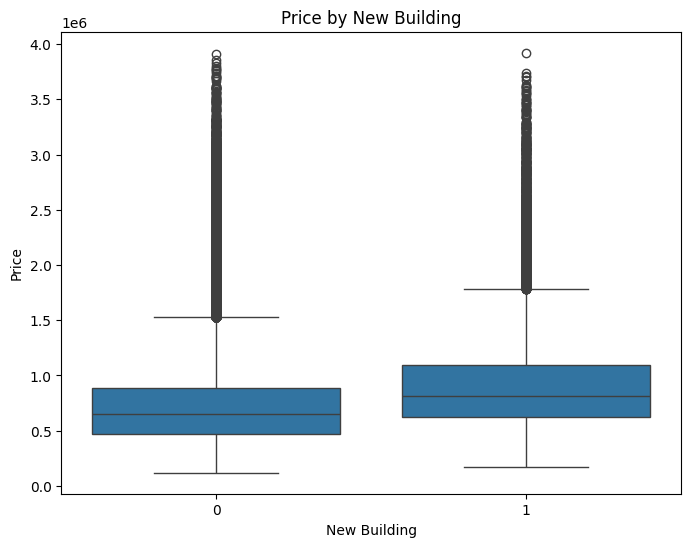

In [ ]:
#Check correlation for flats on ground floor
df['is_old_building'] = np.where((df['apart_age'] >= 150), 1, 0)
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_old_building', y='price_z', data=df)
plt.xlabel('Old Building')
plt.ylabel('Price')
plt.title('Price by Old Building')
plt.show()

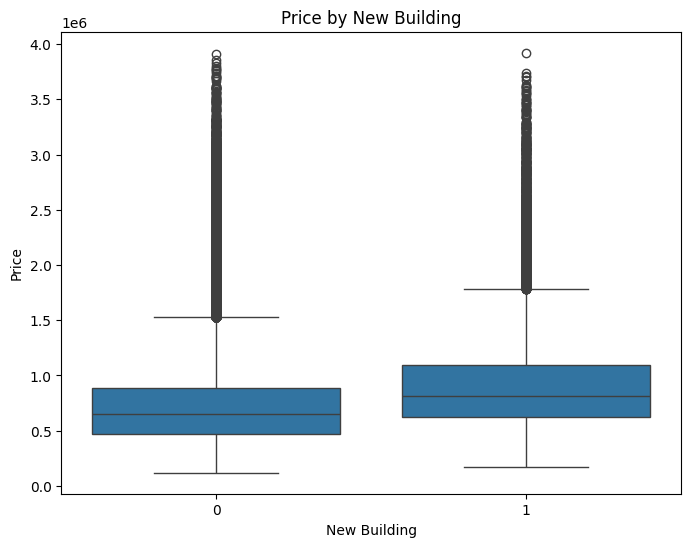

In [603]:
#Check correlation for flats on ground floor
df['is_new_building'] = np.where((df['apart_age'] <= 10), 1, 0)
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_new_building', y='price_z', data=df)
plt.xlabel('New Building')
plt.ylabel('Price')
plt.title('Price by New Building')
plt.show()

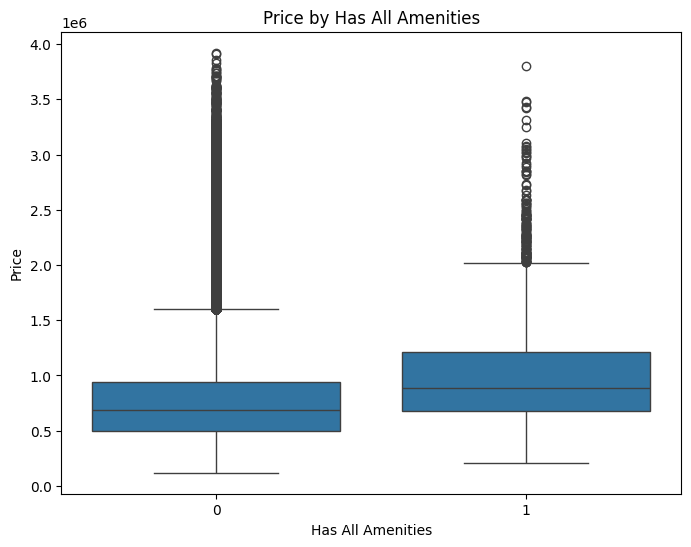

In [625]:
#has_all_amenities = has_park & has_balcony & has_lift & has_sec
df['has_all_amenities'] = np.where((df['has_park'] == 1) & (df['has_balcony'] == 1) & (df['has_lift'] == 1) & (df['has_sec'] == 1), 1, 0)
plt.figure(figsize=(8, 6))
sns.boxplot(x='has_all_amenities', y='price_z', data=df)
plt.xlabel('Has All Amenities')
plt.ylabel('Price')
plt.title('Price by Has All Amenities')
plt.show()

## Distribution of other variables

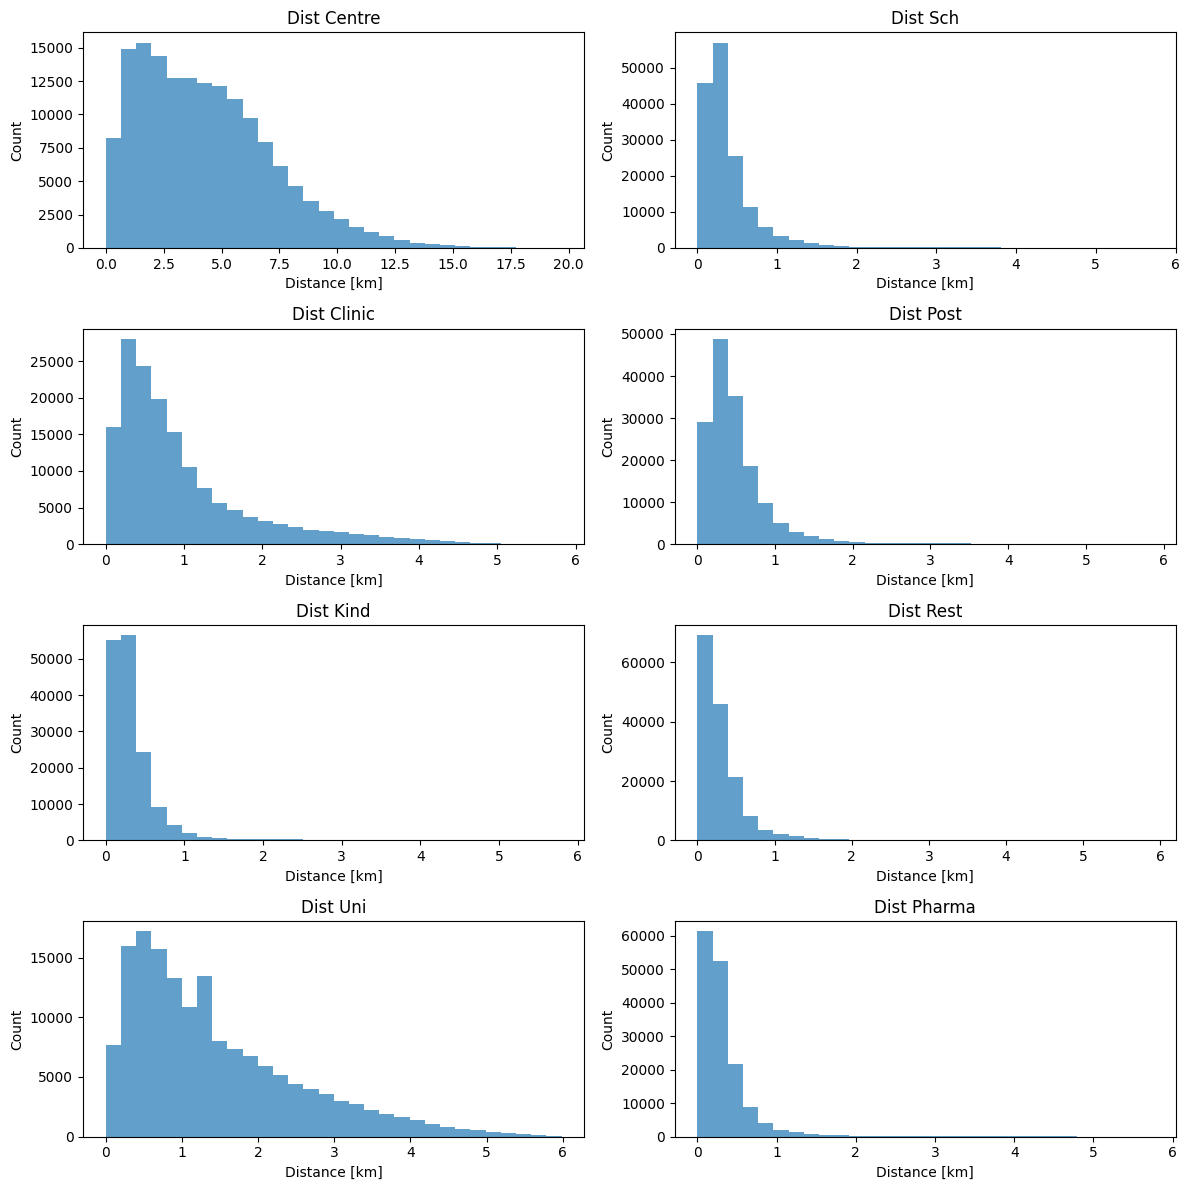

In [525]:
distance_columns = [
    'dist_centre', 'dist_sch', 'dist_clinic', 'dist_post',
    'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma'
]

n_cols = 2
n_rows = (len(distance_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for idx, col in enumerate(distance_columns):
    ax = axes.flatten()[idx]
    df[col].plot.hist(bins=30, alpha=0.7, ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('Distance [km]')
    ax.set_ylabel('Count')

# Hide unused axes if number of plots is odd
for i in range(len(distance_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


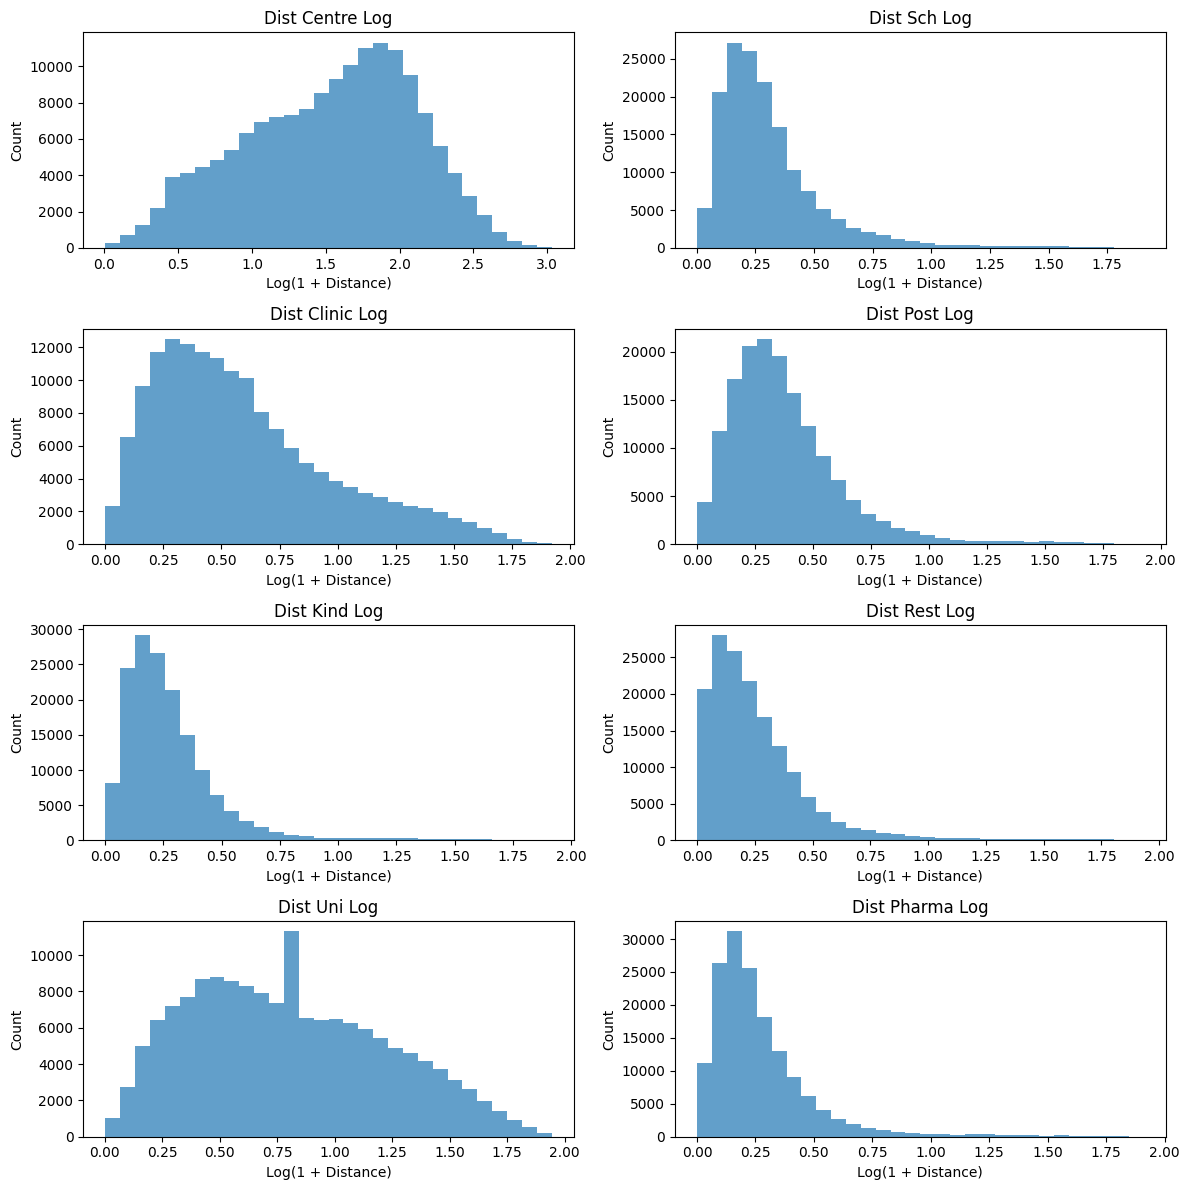

In [526]:
# turning them into logs and then seeing distribution
distance_columns = [
    'dist_centre', 'dist_sch', 'dist_clinic', 'dist_post',
    'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma'
]

for col in distance_columns:
    df[col + '_log'] = np.log1p(df[col])

distance_log_columns = [
    'dist_centre_log',
    'dist_sch_log',
    'dist_clinic_log',
    'dist_post_log',
    'dist_kind_log',
    'dist_rest_log',
    'dist_uni_log',
    'dist_pharma_log'
]

n_cols = 2
n_rows = (len(distance_log_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for idx, col in enumerate(distance_log_columns):
    ax = axes.flatten()[idx]
    df[col].plot.hist(bins=30, alpha=0.7, ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('Log(1 + Distance)')
    ax.set_ylabel('Count')

# Hide unused axes if number of plots is odd
for i in range(len(distance_log_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


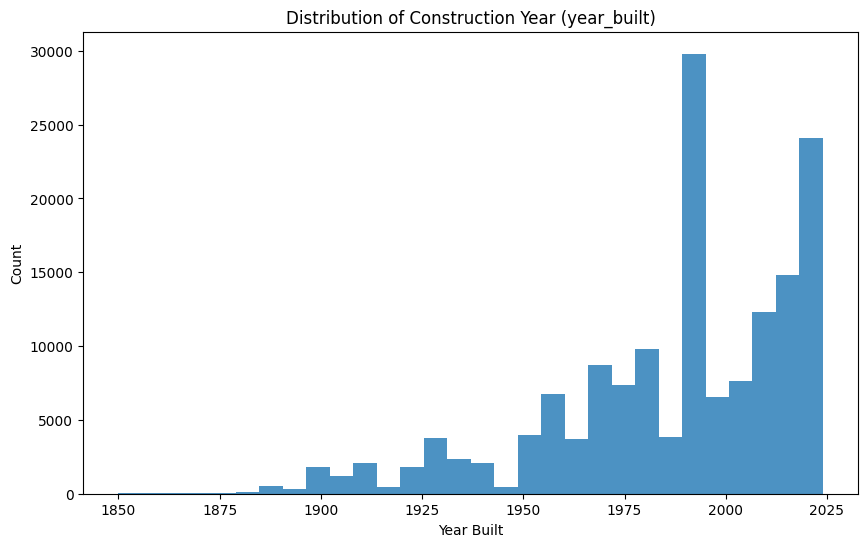

In [527]:
plt.figure(figsize=(10, 6))
df['year_built'].plot.hist(bins=30, alpha=0.8)
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Distribution of Construction Year (year_built)')
plt.show()

In [528]:
# turing year into categorical and one hot encoding. Droppinh first to omit collinearity

bins = [0, 1900, 1920, 1940, 1950, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = [
    'before_1900', '1900_1920', '1920_1940', '1940_1950', '1950_1970',
    '1970_1980', '1980_1990', '1990_2000', '2000_2010', '2010_2020', 'after_2020'
]

df['year_built_cat'] = pd.cut(df['year_built'], bins=bins, labels=labels, right=False)

df = pd.get_dummies(df, columns=['year_built_cat'], prefix='', prefix_sep='', drop_first=True)

df.head()


,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,own_type,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,estimated_maintenance_cost,global_economic_index,src_year,last_floor,log_price,room_size,cost_per_room,dist_facil,dist_centre_log,dist_sch_log,dist_clinic_log,dist_post_log,dist_kind_log,dist_rest_log,dist_uni_log,dist_pharma_log,1900_1920,1920_1940,1940_1950,1950_1970,1970_1980,1980_1990,1990_2000,2000_2010,2010_2020,after_2020
a3a463617a5c0439,0d6c4dfc,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,0.878,0.438,0.134,0.539,2.243,0.168,12631efb,1,1,1,0,1,519626.21,9,693f303c,501710.76,14.02,95.39,44.51,13.99,100.291946,2023,0,13.160865,22.945,6.995000,3.962,2.673873,0.432432,0.630207,0.363253,0.125751,0.431133,1.176499,0.155293,False,False,False,False,False,False,True,False,False,False
23a92531fcb238b4,0c238f18,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,0.979,0.062,0.248,0.151,2.004,0.160,12631efb,1,1,0,0,0,162959.26,4,8d5a4f0c,147763.87,110.55,46.17,56.25,7.59,91.315644,2024,0,12.001256,27.640,7.590000,3.542,1.235471,0.319907,0.682592,0.060154,0.221542,0.140631,1.099945,0.148420,False,False,True,False,False,False,False,False,False,False
d158671401f9fc34,0d6c4dfc,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,1.242,0.563,0.266,0.433,2.067,0.575,12631efb,0,1,0,0,1,1167571.51,10,693f303c,1042847.59,31.15,18.94,50.36,21.14,93.681619,2023,0,13.970437,31.090,10.570000,4.583,2.423386,0.330023,0.807368,0.446607,0.235862,0.359770,1.120700,0.454255,False,False,False,False,False,False,False,True,False,False
280aced4655b7a96,2a6d5c01,53.68,2.0,2.0,4.0,2018.0,10.589,30.0,0.729,1.911,0.045,0.187,0.240,2.648,0.147,12631efb,1,0,1,0,0,907071.16,1,693f303c,728839.39,7.52,11.84,46.69,7.91,94.192062,2024,0,13.717976,26.840,3.955000,5.133,2.450056,0.547543,1.068497,0.044017,0.171429,0.215111,1.294179,0.137150,False,False,False,False,False,False,False,False,True,False
2315fa621e746fe4,2a6d5c01,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,1.974,1.390,0.502,0.088,1.043,0.031,12631efb,1,1,1,0,0,1080383.19,11,693f303c,1263171.15,11.20,89.64,45.60,8.63,96.166051,2023,0,13.892826,23.630,2.876667,3.638,2.230552,0.800206,1.089908,0.871293,0.406798,0.084341,0.714419,0.030529,False,False,False,False,False,False,False,False,True,False


C:\Users\wojci\AppData\Local\Temp\ipykernel_9100\4079674206.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_built_cat', order=labels, palette="Blues")


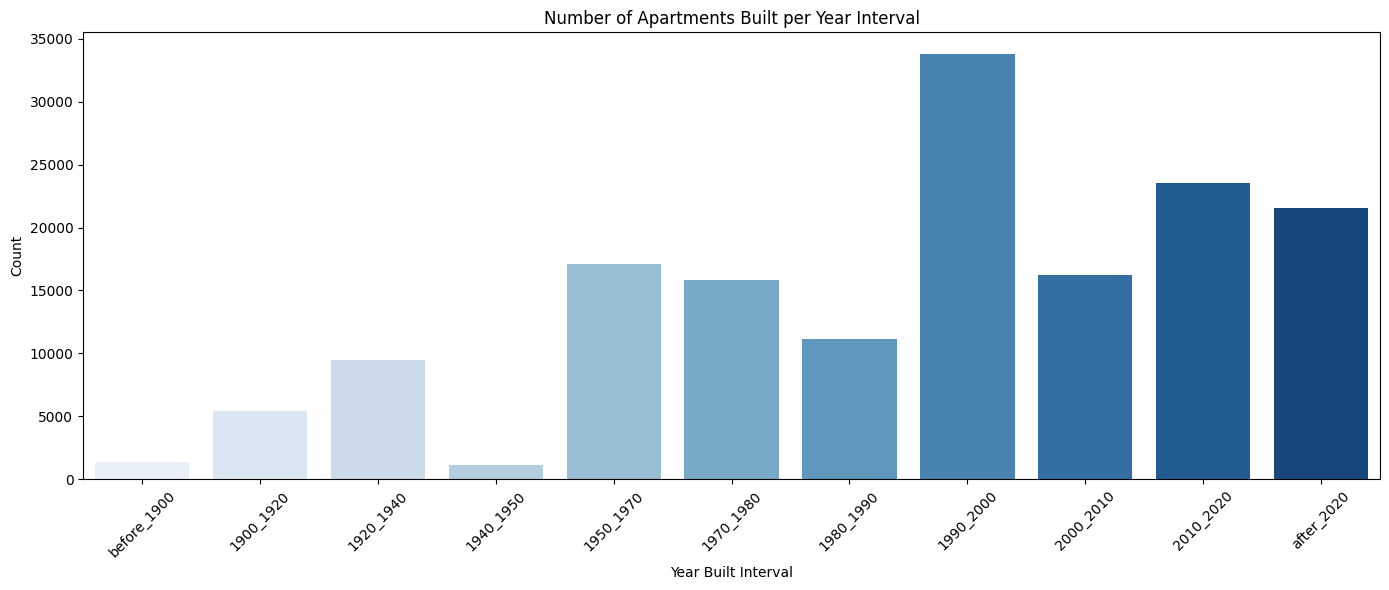

In [529]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, re-create the categorical column if it's already been one-hot encoded
bins = [0, 1900, 1920, 1940, 1950, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = [
    'before_1900', '1900_1920', '1920_1940', '1940_1950', '1950_1970',
    '1970_1980', '1980_1990', '1990_2000', '2000_2010', '2010_2020', 'after_2020'
]

df['year_built_cat'] = pd.cut(df['year_built'], bins=bins, labels=labels, right=False)

# Now plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='year_built_cat', order=labels, palette="Blues")

plt.title("Number of Apartments Built per Year Interval")
plt.xlabel("Year Built Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [530]:
# turing obj_type into dummies - only 4 options

# df = pd.get_dummies(df, columns=['obj_type'], prefix='obj_type', drop_first=True)

# # similar for own_type
# df = pd.get_dummies(df, columns=['own_type'], prefix='own_type', drop_first=True)

# # and finally for loc_code
# df = pd.get_dummies(df, columns=['loc_code'], prefix='loc_code', drop_first=True)

# # and for src_year, why not
# df = pd.get_dummies(df, columns=['src_year'], prefix='src_year', drop_first=True)

In [531]:
df.head()

,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,own_type,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,estimated_maintenance_cost,global_economic_index,src_year,last_floor,log_price,room_size,cost_per_room,dist_facil,dist_centre_log,dist_sch_log,dist_clinic_log,dist_post_log,dist_kind_log,dist_rest_log,dist_uni_log,dist_pharma_log,1900_1920,1920_1940,1940_1950,1950_1970,1970_1980,1980_1990,1990_2000,2000_2010,2010_2020,after_2020,year_built_cat
a3a463617a5c0439,0d6c4dfc,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,0.878,0.438,0.134,0.539,2.243,0.168,12631efb,1,1,1,0,1,519626.21,9,693f303c,501710.76,14.02,95.39,44.51,13.99,100.291946,2023,0,13.160865,22.945,6.995000,3.962,2.673873,0.432432,0.630207,0.363253,0.125751,0.431133,1.176499,0.155293,False,False,False,False,False,False,True,False,False,False,1990_2000
23a92531fcb238b4,0c238f18,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,0.979,0.062,0.248,0.151,2.004,0.160,12631efb,1,1,0,0,0,162959.26,4,8d5a4f0c,147763.87,110.55,46.17,56.25,7.59,91.315644,2024,0,12.001256,27.640,7.590000,3.542,1.235471,0.319907,0.682592,0.060154,0.221542,0.140631,1.099945,0.148420,False,False,True,False,False,False,False,False,False,False,1940_1950
d158671401f9fc34,0d6c4dfc,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,1.242,0.563,0.266,0.433,2.067,0.575,12631efb,0,1,0,0,1,1167571.51,10,693f303c,1042847.59,31.15,18.94,50.36,21.14,93.681619,2023,0,13.970437,31.090,10.570000,4.583,2.423386,0.330023,0.807368,0.446607,0.235862,0.359770,1.120700,0.454255,False,False,False,False,False,False,False,True,False,False,2000_2010
280aced4655b7a96,2a6d5c01,53.68,2.0,2.0,4.0,2018.0,10.589,30.0,0.729,1.911,0.045,0.187,0.240,2.648,0.147,12631efb,1,0,1,0,0,907071.16,1,693f303c,728839.39,7.52,11.84,46.69,7.91,94.192062,2024,0,13.717976,26.840,3.955000,5.133,2.450056,0.547543,1.068497,0.044017,0.171429,0.215111,1.294179,0.137150,False,False,False,False,False,False,False,False,True,False,2010_2020
2315fa621e746fe4,2a6d5c01,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,1.974,1.390,0.502,0.088,1.043,0.031,12631efb,1,1,1,0,0,1080383.19,11,693f303c,1263171.15,11.20,89.64,45.60,8.63,96.166051,2023,0,13.892826,23.630,2.876667,3.638,2.230552,0.800206,1.089908,0.871293,0.406798,0.084341,0.714419,0.030529,False,False,False,False,False,False,False,False,True,False,2010_2020


In [589]:
#Print df columns
print(df.columns)

Index(['obj_type', 'dim_m2', 'n_rooms', 'floor_no', 'floor_max', 'year_built',
       'dist_centre', 'n_poi', 'dist_sch', 'dist_clinic', 'dist_post',
       'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma', 'own_type',
       'has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store',
       'price_z', 'src_month', 'loc_code', 'market_volatility',
       'infrastructure_quality', 'neighborhood_crime_rate', 'popularity_index',
       'estimated_maintenance_cost', 'global_economic_index', 'src_year',
       'last_floor', 'log_price', 'room_size', 'cost_per_room', 'dist_facil',
       'dist_centre_log', 'dist_sch_log', 'dist_clinic_log', 'dist_post_log',
       'dist_kind_log', 'dist_rest_log', 'dist_uni_log', 'dist_pharma_log',
       '1900_1920', '1920_1940', '1940_1950', '1950_1970', '1970_1980',
       '1980_1990', '1990_2000', '2000_2010', '2010_2020', 'after_2020',
       'year_built_cat', 'apart_age', 'lift_3rd', 'ground', 'is_studio',
       'is_new_building', 'is_old_buildi

In [658]:
from sklearn.model_selection import GridSearchCV, train_test_split
# df = pd.read_csv('appartments_train.csv', index_col = 'unit_id')
# Prepare features and target variable
X = df.drop(columns=['price_z','dist_centre_log', 'dist_sch_log',
       'dist_clinic_log', 'dist_post_log', 'dist_kind_log', 'dist_rest_log',
       'dist_uni_log', 'dist_pharma_log', 'log_price', '1900_1920', '1920_1940',
       '1940_1950', '1950_1970', '1970_1980', '1980_1990', '1990_2000',
       '2000_2010', '2010_2020', 'after_2020', 'cost_per_room', 'dist_facil', 'lift_3rd', 'ground', 'has_all_amenities', 'is_villa'])  # All features except targetget
y = df['price_z']  # Target variable

# Initial split: 70% training, 30% temporary holdout (stratified)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, 
    y, 
    test_size=0.30, 
    random_state=244  # Reproducibility
)

# Split temporary holdout into validation and test sets (50/50 of the 30%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, 
    y_temp, 
    test_size=0.50, 
    random_state=244  # Reproducibility
)

# Print dataset sizes for verification
print(f"Dataset sizes:")
print(f"Train: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")

# Check for missing values in each dataset
print("\nMissing value counts:")
print(f"Training set: {X_train.isna().sum().sum()} missing values")
print(f"Validation set: {X_val.isna().sum().sum()} missing values")
print(f"Test set: {X_test.isna().sum().sum()} missing values")

Dataset sizes:
Train: (109517, 39)
Validation: (23468, 39)
Test: (23469, 39)

Missing value counts:
Training set: 0 missing values
Validation set: 0 missing values
Test set: 0 missing values


In [659]:
print(X.columns)

Index(['obj_type', 'dim_m2', 'n_rooms', 'floor_no', 'floor_max', 'year_built',
       'dist_centre', 'n_poi', 'dist_sch', 'dist_clinic', 'dist_post',
       'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma', 'own_type',
       'has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store',
       'src_month', 'loc_code', 'market_volatility', 'infrastructure_quality',
       'neighborhood_crime_rate', 'popularity_index',
       'estimated_maintenance_cost', 'global_economic_index', 'src_year',
       'last_floor', 'room_size', 'year_built_cat', 'apart_age', 'is_studio',
       'is_new_building', 'is_old_building', 'is_central', 'is_top_floor'],
      dtype='object')


In [660]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, 
                                  TargetEncoder, FunctionTransformer, PolynomialFeatures)
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from feature_engine.encoding import RareLabelEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.ensemble import RandomForestRegressor
import numpy as np

log_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Definicja funkcji do transformacji logarytmicznej
def safe_log1p(x):
    """Apply log1p transformation with protection against negative values"""
    x = np.where(x < 0, 1e-10, x)  # Replace negatives with small positive value
    return np.log1p(x)

log_transformer = FunctionTransformer(safe_log1p, feature_names_out='one-to-one')

# 1. Pipeline dla cech numerycznych
numeric_transformer = Pipeline([
   
    # Transformacje nieliniowe (wybór jednej z opcji)
    ("transform", FeatureUnion([
        ("log", log_transformer)
        ,
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("pca", PCA(n_components=5))

        
    ])),
    
    # Skalowanie (wybór jednej z opcji)
    ("scaler", StandardScaler()),  # lub RobustScaler() dla danych z outliers
])

# 2. Pipeline dla cech kategorycznych
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('target', TargetEncoder()),  # Encode high-cardinality categories
    ("scaler", StandardScaler()),  # lub RobustScaler() dla danych z outliers
])

# Build the complete preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, log_cols),
    ('target', categorical_transformer, target_cols),
])

n_log = len(log_cols)  # Number of log-transformed features (5)
n_target = len(target_cols)  # Number of target-encoded features (7)

# Fit preprocessor on training data
preprocessor.fit(X_train, y_train)

# Get indices of categorical features for SMOTE
# (Target encoding produces one column per input feature)
target_indices = list(range(n_log, n_log + n_target))
categorical_features_indices = target_indices

In [661]:
correlations = df[log_cols + ['price_z']].corr()['price_z'].sort_values(ascending=False)
print(correlations)

price_z                       1.000000
market_volatility             0.972458
dim_m2                        0.563239
n_rooms                       0.472877
estimated_maintenance_cost    0.389225
has_lift                      0.198851
n_poi                         0.175313
is_new_building               0.172721
room_size                     0.166422
has_park                      0.135554
has_sec                       0.134155
year_built                    0.114764
dist_centre                   0.083120
has_balcony                   0.069637
floor_max                     0.031152
floor_no                      0.024819
is_old_building               0.002647
global_economic_index         0.002049
popularity_index              0.001230
dist_sch                     -0.000162
neighborhood_crime_rate      -0.002497
dist_post                    -0.010386
last_floor                   -0.012404
is_top_floor                 -0.012404
dist_pharma                  -0.012583
dist_uni                 

In [662]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

def train_and_tune_regressor(model, param_grid, X_train, y_train, X_val, y_val, 
                            model_name='Model', cv=5, n_jobs=-1, verbose=1):
    """
    Trains and tunes a regression model using GridSearchCV.
    
    Args:
        model: Base regressor model
        param_grid: Dictionary of hyperparameters to tune
        X_train: Training features
        y_train: Training target
        X_val: Validation features
        y_val: Validation target
        model_name: Name for model identification
        cv: Number of cross-validation folds
        n_jobs: Number of jobs to run in parallel
        verbose: Controls verbosity
        
    Returns:
        best_estimator: The best performing model from GridSearchCV
        results: Dictionary with evaluation metrics
    """
    
    # Create scoring dictionary
    scoring = {
        'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False),
        'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
        'R2': 'r2'
    }

    # Create pipeline with preprocessing and regressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Your predefined preprocessor
        ('regressor', model)  # Regressor model
    ])

    # Configure GridSearchCV
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid={'regressor__' + k: v for k, v in param_grid.items()},  # Add regressor prefix
        scoring=scoring,
        refit='RMSE',  # Metric to choose best model
        cv=3,
        n_jobs=n_jobs,
        verbose=verbose
    )

    # Train model with hyperparameter tuning
    grid.fit(X_train, y_train)

    # Evaluate on validation set
    y_val_pred = grid.predict(X_val)
    
    # Calculate metrics
    val_metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'MAE': mean_absolute_error(y_val, y_val_pred),
        'R2': r2_score(y_val, y_val_pred)
    }

    # Print results
    print(f"\n{model_name} Results")
    print("=" * 50)
    print("Best parameters:", grid.best_params_)
    print(f"Validation RMSE: {val_metrics['RMSE']:.4f}")
    print(f"Validation MAE: {val_metrics['MAE']:.4f}")
    print(f"Validation R2: {val_metrics['R2']:.4f}")
    print("=" * 50)

    return grid.best_estimator_, val_metrics

In [663]:
from sklearn.linear_model import LinearRegression

# 1. Model
lr_model = LinearRegression()

# 2. Parametry do tuningu (ograniczone – można np. dodać fit_intercept i normalize, choć normalize jest deprecated)
param_grid_lr = {
    'fit_intercept': [True],
    'positive': [False]
}

# 3. Wywołanie funkcji
best_lr, metrics_lr = train_and_tune_regressor(
    model=lr_model,
    param_grid=param_grid_lr,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    model_name='Linear Regression'
)


Fitting 3 folds for each of 1 candidates, totalling 3 fits

Linear Regression Results
Best parameters: {'regressor__fit_intercept': True, 'regressor__positive': False}
Validation RMSE: 93388.7305
Validation MAE: 68817.3036
Validation R2: 0.9521


In [624]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

param_grid_ridge = {
    'alpha': [0.00001],
    'fit_intercept': [True],
    'solver': ['auto'],
    'positive': [False]
}

best_ridge, metrics_ridge = train_and_tune_regressor(
    model=ridge_model,
    param_grid=param_grid_ridge,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    model_name='Ridge Regression'
)


Fitting 3 folds for each of 1 candidates, totalling 3 fits

Ridge Regression Results
Best parameters: {'regressor__alpha': 1e-05, 'regressor__fit_intercept': True, 'regressor__positive': False, 'regressor__solver': 'auto'}
Validation RMSE: 93388.5157
Validation MAE: 68817.5946
Validation R2: 0.9521


In [664]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(max_iter=10000)

param_grid_lasso = {
    'alpha': [0.0001],
    'fit_intercept': [True],
    'positive': [False]
}

best_lasso, metrics_lasso = train_and_tune_regressor(
    model=lasso_model,
    param_grid=param_grid_lasso,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    model_name='Lasso Regression'
)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\wojci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.807e+14, tolerance: 2.016e+12
  model = cd_fast.enet_coordinate_descent(



Lasso Regression Results
Best parameters: {'regressor__alpha': 0.0001, 'regressor__fit_intercept': True, 'regressor__positive': False}
Validation RMSE: 93443.4536
Validation MAE: 68916.7989
Validation R2: 0.9521


In [665]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(max_iter=10000)

param_grid_elastic = {
    'alpha': [0.001],
    'l1_ratio': [0.2,],
    'fit_intercept': [True]
}

best_elastic, metrics_elastic = train_and_tune_regressor(
    model=elastic_model,
    param_grid=param_grid_elastic,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    model_name='ElasticNet'
)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\wojci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.846e+14, tolerance: 2.016e+12
  model = cd_fast.enet_coordinate_descent(



ElasticNet Results
Best parameters: {'regressor__alpha': 0.001, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.2}
Validation RMSE: 93546.1067
Validation MAE: 68985.0090
Validation R2: 0.9520


#### Best Model on Test Set

In [666]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

param_grid_ridge = {
    'alpha': [0.00001],
    'fit_intercept': [True],
    'solver': ['auto'],
    'positive': [False]
}

best_ridge, metrics_ridge = train_and_tune_regressor(
    model=ridge_model,
    param_grid=param_grid_ridge,
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    model_name='Ridge Regression'
)


Fitting 3 folds for each of 1 candidates, totalling 3 fits

Ridge Regression Results
Best parameters: {'regressor__alpha': 1e-05, 'regressor__fit_intercept': True, 'regressor__positive': False, 'regressor__solver': 'auto'}
Validation RMSE: 96183.4839
Validation MAE: 70232.9985
Validation R2: 0.9519


#### Final Model Training

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

param_grid_ridge = {
    'alpha': [0.00001],
    'fit_intercept': [True],
    'solver': ['auto'],
    'positive': [False]
}

best_ridge, metrics_ridge = train_and_tune_regressor(
    model=ridge_model,
    param_grid=param_grid_ridge,
    X_train=X_train+X_val,
    y_train=y_train+y_val,
    X_val=X_test,
    y_val=y_test,
    model_name='Ridge Regression'
)

#### Predictions

In [ ]:
import pandas as pd

# 1. Load the test dataset
appartments_test = pd.read_csv("appartments_test.csv")

# 2. Apply preprocessing (assuming 'preprocessor' was already fitted on full train data)
X_appartments_test = preprocessor.transform(appartments_test)

# 3. Generate predictions using the best Ridge model
y_pred_appartments = best_ridge.predict(X_appartments_test)

# 4. Save predictions to CSV
output = pd.DataFrame({
    "id": appartments_test.index,  # or another unique identifier column if present
    "prediction": y_pred_appartments
})

output.to_csv("predictions_appartments.csv", index=False)

print("✅ Predictions saved to 'predictions_appartments.csv'")
